In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import caffe
import time
import glob

In [2]:
def top_k(result, top_num, label_arr):
    tmp = -(top_num+1)
    top_k = result.flatten().argsort()[-1:tmp:-1]
    top_num = 1
    for i in np.arange(top_k.size):
        print("Top %d:\tProb:%2.4f%%\t[%d]\t %s"%(top_num,result[top_k[i]]*100,top_k[i], labels[top_k[i]]))
        top_num = top_num + 1

In [3]:
def loss_rate(arr1, arr2):
#     print arr1, arr2
    return np.sum(np.absolute(np.subtract(arr1,arr2)))/len(arr1)


In [4]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(np.sum(targets*np.log(predictions+1e-9)))/N
    return ce

Input image dimension (227, 227, 3)


(-0.5, 226.5, 226.5, -0.5)

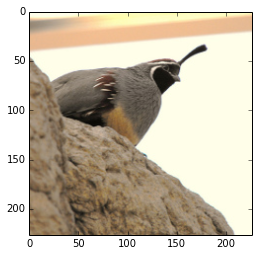

In [5]:
image_path = '/home/caslab/workspace/NVDLA/sw_5_17/sw/prebuilt/linux/image/quail227.jpg'
im = caffe.io.load_image(image_path)
print "Input image dimension" , im.shape
plt.imshow(im)
plt.axis('on')

In [6]:
labels_filename = '/home/caslab/workspace/caffe/caffe/data/ilsvrc12/synset_words.txt'
labels = np.loadtxt(labels_filename, str, delimiter='\t')
print("Read label ... %s"%labels_filename)
print ("Number of class is %d"%len(labels))

Read label ... /home/caslab/workspace/caffe/caffe/data/ilsvrc12/synset_words.txt
Number of class is 1000


In [7]:
print ("Open DIMG file ...")
dimg_path = '/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/dimg/'
dimg_file_no_mean = dimg_path + 'alexnet_no_mean.dimg'
# print dimg_file_no_mean
dimg_no_mean = np.genfromtxt(dimg_file_no_mean, float, delimiter=' ')

dimg_file_mean_bgr =  dimg_path +  'alexnet_mean_BGR.dimg'
dimg_mean_bgr = np.genfromtxt(dimg_file_mean_bgr, float, delimiter=' ')

dimg_file_mean_rgb =  dimg_path +  'alexnet_mean_RGB.dimg'
dimg_mean_rgb = np.genfromtxt(dimg_file_mean_rgb, float, delimiter=' ')

# print ("DImg size of %d"%len(dimg))
# (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(dimg_file)
# print("\nNVDLA last modified: %s" % time.ctime(mtime))

Open DIMG file ...


In [8]:
print "Caffe model config ..."
pycaffe_dir = '/home/caslab/workspace/caffe/caffe/python/'
input_file = image_path
# model_def = pycaffe_dir + "../models/bvlc_reference_caffenet/deploy.prototxt"
# pretrained_model = pycaffe_dir + "../models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel"
model_def = os.path.join(pycaffe_dir,"../models/bvlc_reference_caffenet/deploy.prototxt")
pretrained_model = os.path.join(pycaffe_dir,"../models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel")
print (model_def,"\n",pretrained_model)
gpu = False
center_only = True
images_dim = '227,227'
mean_file = os.path.join(pycaffe_dir,'caffe/imagenet/ilsvrc_2012_mean.npy')
# input_scale = 
raw_scale = 255.0
channel_swap = '2,1,0'
ext = 'jpg'


image_dims = [int(s) for s in images_dim.split(',')]
# print image_dims

mean, channel_swap_arr = None, None
if mean_file:
    mean = np.load(mean_file)
    # mean=mean.mean(1).mean(1) # add
if channel_swap:
    channel_swap_arr = [int(s) for s in channel_swap.split(',')]
#     print channel_swap_arr
if gpu:
    caffe.set_mode_gpu()
    print("GPU mode")
else:
    caffe.set_mode_cpu()
    print("\tCPU mode")

Caffe model config ...
('/home/caslab/workspace/caffe/caffe/python/../models/bvlc_reference_caffenet/deploy.prototxt', '\n', '/home/caslab/workspace/caffe/caffe/python/../models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel')
	CPU mode


In [9]:
classifier = caffe.Classifier(model_def, pretrained_model,
        image_dims=image_dims, mean=None,
#         image_dims=image_dims, mean=mean,
        raw_scale=raw_scale,
        channel_swap=channel_swap_arr)

In [10]:
load_img_time_start = time.time()
# Load image file.
print("Loading folder: %s" % input_file)
inputs =[caffe.io.load_image(input_file)]
load_img_time_end = time.time()

Loading folder: /home/caslab/workspace/NVDLA/sw_5_17/sw/prebuilt/linux/image/quail227.jpg


In [11]:
print("Classifying %d inputs." % len(inputs))

# Classify.
predictions = classifier.predict(inputs, not center_only)
end = time.time()
print ""
# print predictions
# top_k(result = predictions[0], top_num = 10, label_arr = labels)

Classifying 1 inputs.



Input image dimension (227, 227, 3)


(-0.5, 226.5, 226.5, -0.5)

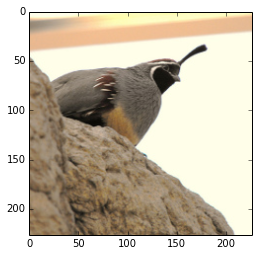

In [12]:
print "Input image dimension" , im.shape
plt.imshow(im)
plt.axis('on')

In [13]:
print("Predict obect .... [quail]\n")
print("Caffe Prediction Result No Mean")
top_k(result = predictions[0], top_num = 10, label_arr = labels)
print("\nNVDLA Prediction Result No Mean")
top_k(result = dimg_no_mean, top_num = 10, label_arr = labels)
# print("\nNVDLA Prediction Result Mean BGR")
# top_k(result = dimg_mean_bgr, top_num = 10, label_arr = labels)
# print("\nNVDLA Prediction Result Mean RGB")
# top_k(result = dimg_mean_rgb, top_num = 10, label_arr = labels)

Predict obect .... [quail]

Caffe Prediction Result No Mean
Top 1:	Prob:21.5835%	[299]	 n02138441 meerkat, mierkat
Top 2:	Prob:16.0849%	[20]	 n01601694 water ouzel, dipper
Top 3:	Prob:13.3790%	[15]	 n01558993 robin, American robin, Turdus migratorius
Top 4:	Prob:12.5567%	[85]	 n01806567 quail
Top 5:	Prob:8.9954%	[16]	 n01560419 bulbul
Top 6:	Prob:4.3712%	[19]	 n01592084 chickadee
Top 7:	Prob:4.2239%	[138]	 n02018795 bustard
Top 8:	Prob:4.1558%	[13]	 n01534433 junco, snowbird
Top 9:	Prob:3.5456%	[94]	 n01833805 hummingbird
Top 10:	Prob:1.6853%	[336]	 n02361337 marmot

NVDLA Prediction Result No Mean
Top 1:	Prob:30.8105%	[15]	 n01558993 robin, American robin, Turdus migratorius
Top 2:	Prob:25.9521%	[16]	 n01560419 bulbul
Top 3:	Prob:15.9790%	[13]	 n01534433 junco, snowbird
Top 4:	Prob:12.2559%	[19]	 n01592084 chickadee
Top 5:	Prob:7.8491%	[85]	 n01806567 quail
Top 6:	Prob:2.1133%	[10]	 n01530575 brambling, Fringilla montifringilla
Top 7:	Prob:1.7242%	[94]	 n01833805 hummingbird
Top 8:	Pr

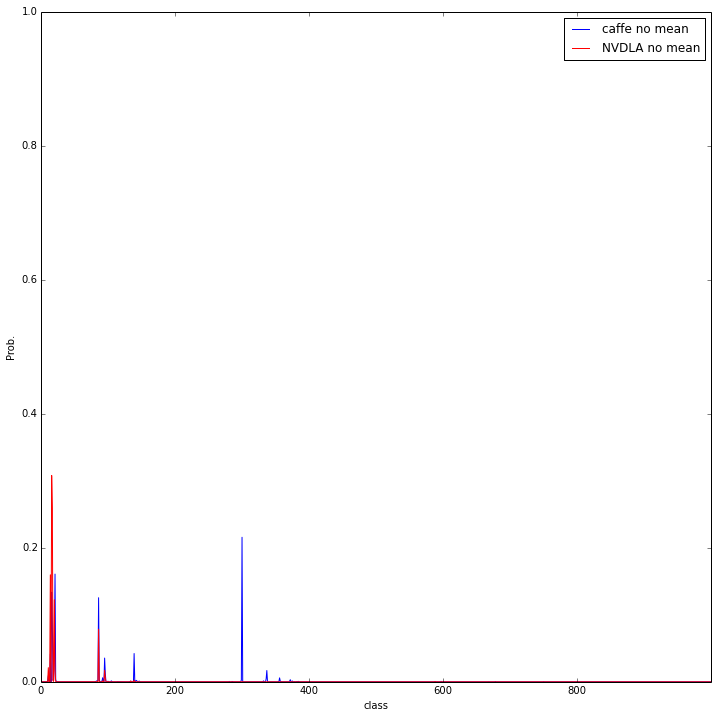

Loss rate with caffe and nvdla : 0.110602% 

Loss rate with caffe and nvdla : 0.257022% 



In [14]:
pixel_width = 12
pixel_height = 12
plt.figure(figsize=(pixel_width, pixel_height))
aa = range(1,1001)

l1, = plt.plot(aa,predictions[0], label = 'caffe no mean', color = 'blue')
l2, = plt.plot(aa,dimg_no_mean, label = 'NVDLA no mean', color = 'red')
# l3, = plt.plot(aa,dimg_mean_bgr, label = 'NVDLA mean BGR', color = 'black')
# l4, = plt.plot(aa,dimg_mean_rgb, label = 'NVDLA mean RGB', color = 'green')

plt.xlim((0,999))
plt.ylim((0, 1))

plt.xlabel('class')
plt.ylabel('Prob.')

plt.legend() #, labels = ['caffe', 'no mean'], loc = 'best')

plt.show()

print("Loss rate with caffe and nvdla : %f%% \n"%(loss_rate(predictions[0], dimg_no_mean)*100))
print("Loss rate with caffe and nvdla : %f%% \n"%(cross_entropy(predictions[0], dimg_no_mean)*100))
# print("Loss rate with caffe and nvdla : %f%% \n"%(loss_rate(predictions[0], dimg_mean_bgr)*100))
# print("Loss rate with caffe and nvdla : %f%% \n"%(loss_rate(predictions[0], dimg_mean_rgb)*100))
